# Frequency and Phase

The widget below generates, plays, and plots two audio signals, each consisting of a simple sine wave:
$$S_1(t) = \sin(2 \pi f_1 t) $$
$$S_2(t) = \sin(2 \pi f_2 t + \phi) $$
The sliders below control the frequencies ($f_1$ and $f_2$) of each tone, along with the relative phase $\phi$ between them. Clicking "Go!" executes the code with the values set by the slide bars. The code then
1. Plays the audio signal corresponding to $S_1(t) + S_2(t)$,
2. Plots each individual signal and their sum (left-hand plots), and 
3. Plots the Fourier transform (FT) of each signal and their sum (right-hand plots). In the Fourier transform plots, blue curves represent the real component of the FT, while red curves represent the imaginary part. 

Note: to reset all values to their defaults, simply refresh the web page. 

In [7]:
from IPython.display import Javascript, display
from ipywidgets import widgets
import numpy as np
import math
import matplotlib.pyplot as plt

import IPython.display as ipd

# Define the time axis
fsamp = 44100 # sample rate (Hz)
dt = 1/fsamp  # Time step (seconds)
tstop = 1.0    # seconds
taxis = np.arange(0, tstop, dt)
Npts = len(taxis)

# Define the frequency axis
faxis = np.fft.fftfreq(Npts)/dt


def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))
    
phase_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=2*math.pi,
    step=0.01,
    description='Relative Phase:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

freq1_slider = widgets.IntSlider(
    value=110,
    min=50,
    max=440,
    step=1,
    description='Frequency (Hz):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

freq2_slider = widgets.IntSlider(
    value=110,
    min=50,
    max=440,
    step=1,
    description='Frequency (Hz):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

button = widgets.Button(description="Go!")
button.on_click(run_all)
display(freq1_slider)
display(freq2_slider)
display(phase_slider)
display(button)

IntSlider(value=110, continuous_update=False, description='Frequency (Hz):', max=440, min=50)

IntSlider(value=110, continuous_update=False, description='Frequency (Hz):', max=440, min=50)

FloatSlider(value=0.0, continuous_update=False, description='Relative Phase:', max=6.283185307179586, readout_…

Button(description='Go!', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

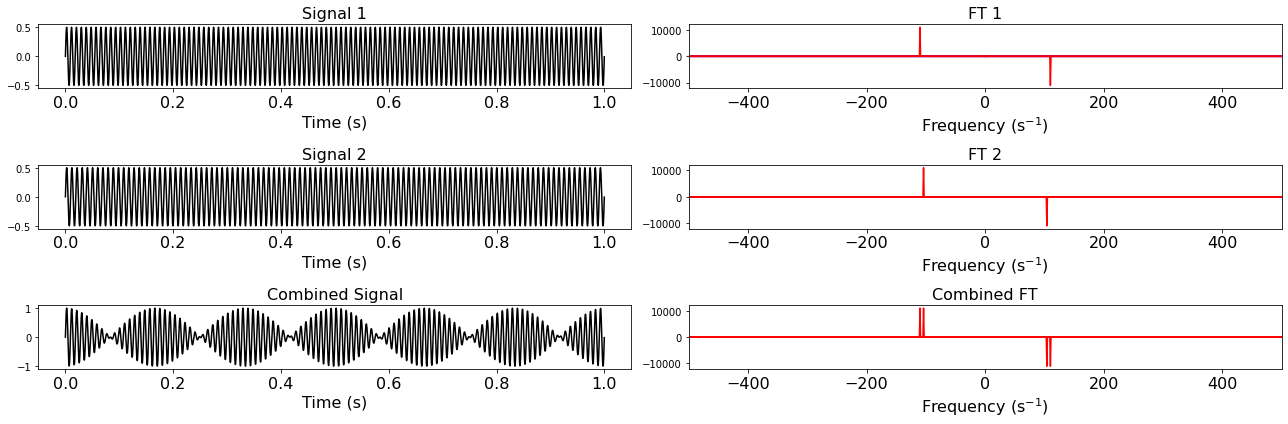

In [9]:
ftone1 = freq1_slider.value
ftone2 = freq2_slider.value
phase = phase_slider.value

x1 = 0.5*np.sin(2*np.pi*ftone1*taxis)
x2 = 0.5*np.sin(2*np.pi*ftone2*taxis+phase)

ft1 = np.fft.fft(x1)
ft2 = np.fft.fft(x2)

plt.figure(figsize=(18,6))


FS = 16
def format_taxis(title):
    plt.title(title, fontsize=FS)
    plt.xlabel('Time (s)', fontsize=FS)
    plt.xticks(fontsize=FS)
    
def format_faxis(title):
    plt.title(title, fontsize=FS)
    plt.xlabel('Frequency (s$^{-1}$)', fontsize=FS)
    plt.xticks(fontsize=FS)
    plt.xlim(-500,500)

# Plot the time-domain signal
plt.subplot(3,2,1)
plt.plot(taxis, x1, 'k')
format_taxis('Signal 1')

plt.subplot(3,2,3)
plt.plot(taxis, x2, 'k')
format_taxis('Signal 2')

plt.subplot(3,2,5)
plt.plot(taxis, x1+x2, 'k')
format_taxis('Combined Signal')

# Plot the time-domain signal
plt.subplot(3,2,2)
plt.plot(faxis, np.real(ft1), 'b')
plt.plot(faxis, np.imag(ft1), 'r')
format_faxis('FT 1')

plt.subplot(3,2,4)
plt.plot(faxis, np.real(ft2), 'b')
plt.plot(faxis, np.imag(ft2), 'r')
format_faxis('FT 2')

plt.subplot(3,2,6)
plt.plot(faxis, np.real(ft1+ft2), 'b')
plt.plot(faxis, np.imag(ft1+ft2), 'r')
format_faxis('Combined FT')

plt.tight_layout()

ipd.Audio(x1 + x2, rate=fsamp, autoplay=True) # load a NumPy array